In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import re
import json
import pickle

In [4]:
df1 = pd.read_csv(r"C:\Users\tpsna\OneDrive\Desktop\VSCode\Singapore_Project\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv(r"C:\Users\tpsna\OneDrive\Desktop\VSCode\Singapore_Project\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv(r"C:\Users\tpsna\OneDrive\Desktop\VSCode\Singapore_Project\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv(r"C:\Users\tpsna\OneDrive\Desktop\VSCode\Singapore_Project\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv(r"C:\Users\tpsna\OneDrive\Desktop\VSCode\Singapore_Project\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df = pd.concat([df1 , df2 , df3, df4, df5],axis=0)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [5]:
df.tail(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
181556,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,908000.0,62 years 11 months
181557,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,800000.0,63 years
181558,2024-03,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,855000.0,62 years 08 months
181559,2024-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,62 years 10 months
181560,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62 years 10 months
181561,2024-05,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,948000.0,62 years 09 months
181562,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months
181563,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62 years 08 months
181564,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months
181565,2024-03,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,1200000.0,62 years 09 months


In [6]:
df.shape

(927769, 11)

In [7]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [8]:
# droping remaining_lease missing values
df_null = df.dropna()
df_null.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927769 entries, 0 to 181565
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927769 non-null  object 
 1   town                 927769 non-null  object 
 2   flat_type            927769 non-null  object 
 3   block                927769 non-null  object 
 4   street_name          927769 non-null  object 
 5   storey_range         927769 non-null  object 
 6   floor_area_sqm       927769 non-null  float64
 7   flat_model           927769 non-null  object 
 8   lease_commence_date  927769 non-null  int64  
 9   resale_price         927769 non-null  float64
 10  remaining_lease      218719 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 84.9+ MB


In [10]:
#Removing the alphanumeric characters from the block column
# Converting the block column to int
df['block'] = df['block'].astype(str)
df['block'] = df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))
# Now df['block'] should contain only digits in each element
df['block'] = df['block'].astype(int)


In [11]:
#converting the month column to year and month
df['month'] = pd.to_datetime(df['month'])
#Convert month to year and month
df['year'] = df['month'].apply(lambda i : i.year)
df['month'] = df['month'].apply(lambda i : i.month)


In [12]:
df.describe()


,month,block,floor_area_sqm,lease_commence_date,resale_price,year
count,927769.000000,927769.000000,927769.000000,927769.000000,9.277690e+05,927769.000000
mean,6.550306,348.763297,95.690326,1988.281130,3.209383e+05,2006.180235
std,3.412481,255.138443,25.824063,10.668351,1.705994e+05,9.328823
min,1.000000,1.000000,28.000000,1966.000000,5.000000e+03,1990.000000
25%,4.000000,127.000000,73.000000,1981.000000,1.930000e+05,1999.000000
50%,7.000000,302.000000,93.000000,1986.000000,2.980000e+05,2005.000000
75%,10.000000,534.000000,113.000000,1996.000000,4.180000e+05,2014.000000
max,12.000000,999.000000,307.000000,2020.000000,1.588000e+06,2024.000000


In [13]:
df.to_csv('ResaleFlatPricesupdated.csv', index=False)

###Exploratory Data Analysis

C:\Users\tpsna\AppData\Local\Temp\ipykernel_14460\3469755678.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['block'])


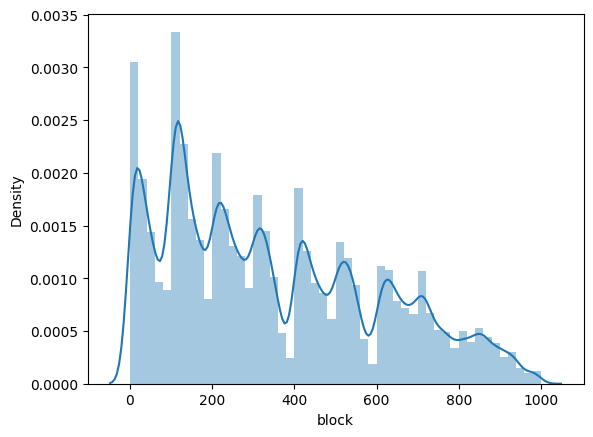

C:\Users\tpsna\AppData\Local\Temp\ipykernel_14460\3469755678.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['floor_area_sqm'])


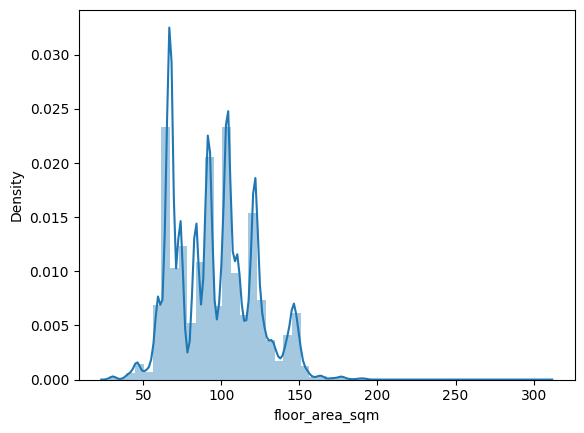

C:\Users\tpsna\AppData\Local\Temp\ipykernel_14460\3469755678.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lease_commence_date'])


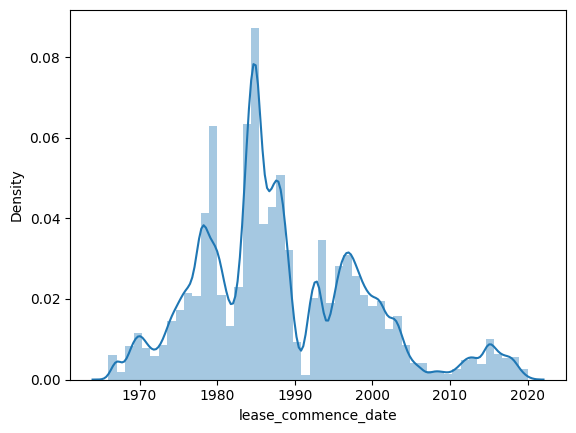

In [14]:
#Checking Distribution
sns.distplot(df['block'])
plt.show()
sns.distplot(df['floor_area_sqm'])
plt.show()
sns.distplot(df['lease_commence_date'])
plt.show()


In [15]:
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

          flat_type  flat_model
0            1 ROOM           2
1            2 ROOM           9
2            3 ROOM          15
3            4 ROOM          18
4            5 ROOM          17
5         EXECUTIVE           8
6  MULTI GENERATION           2


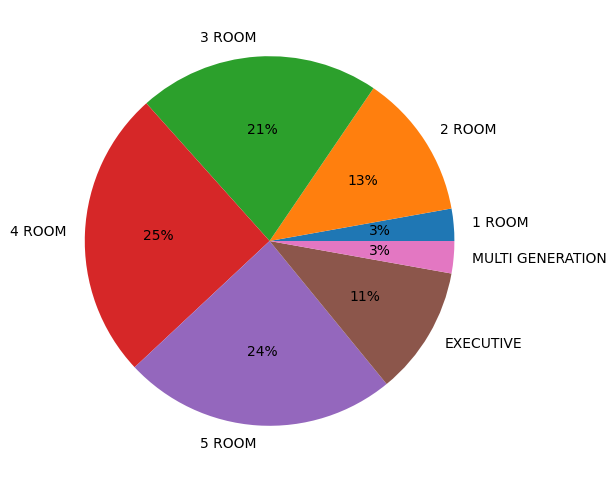

In [16]:
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (12,6))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()


<Axes: xlabel='flat_type', ylabel='floor_area_sqm'>

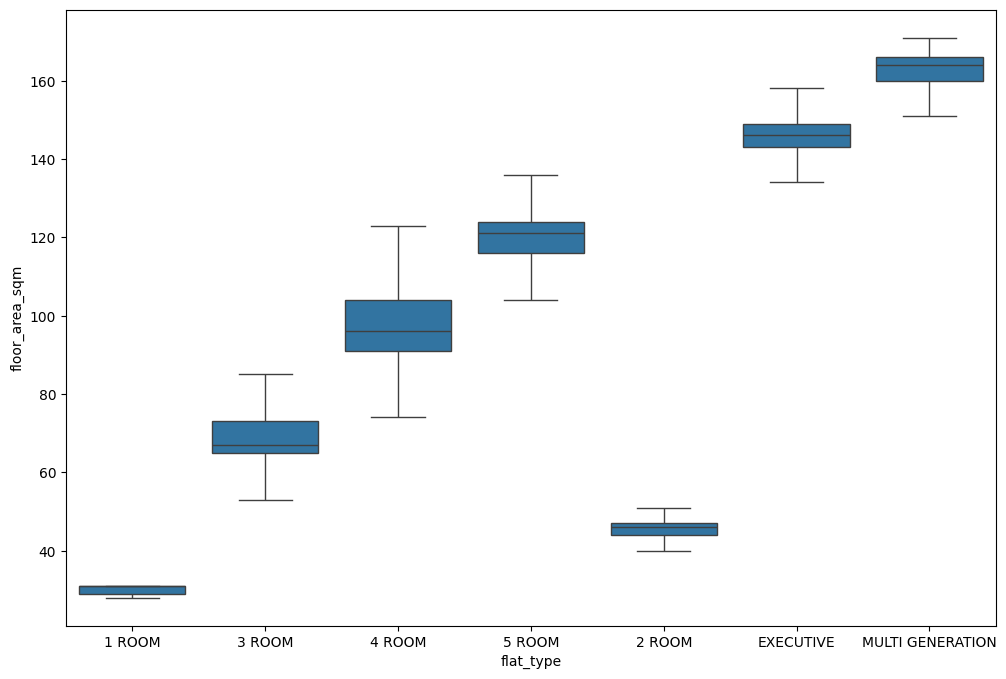

In [17]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = df, showfliers = False)


<Axes: xlabel='flat_type', ylabel='resale_price'>

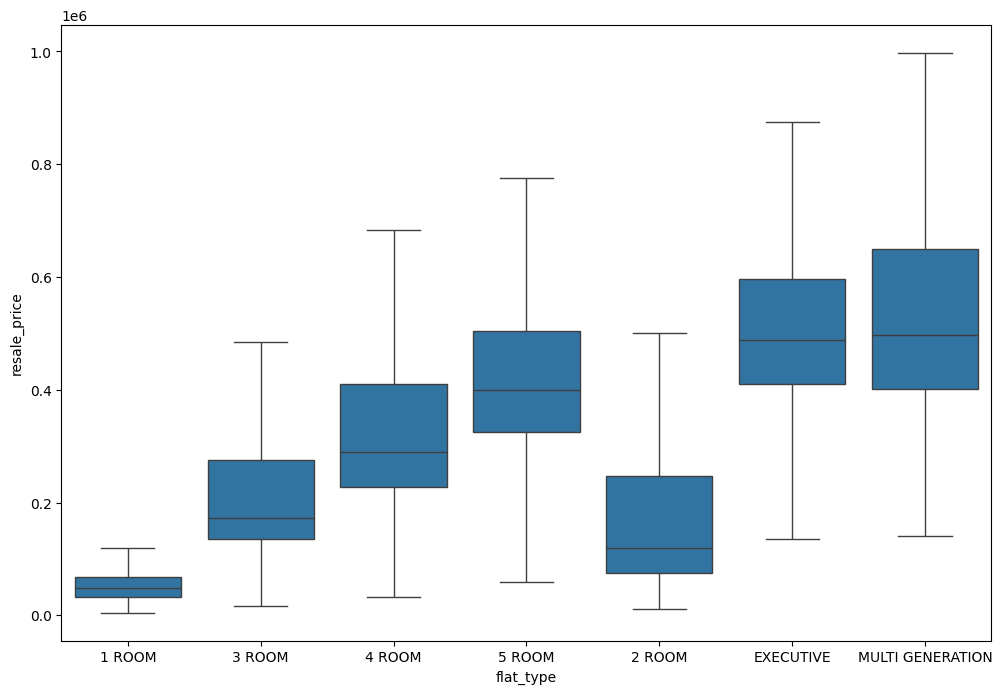

In [18]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'flat_type', y ='resale_price', data = df, showfliers = False)


In [19]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year'],
      dtype='object')

In [20]:
print(df['month'].unique())
print("---------------------------------------------------------------")
print(df['year'].unique())
print("---------------------------------------------------------------")
print(df['town'].unique())
print("---------------------------------------------------------------")
print(df['flat_type'].unique())
print("---------------------------------------------------------------")
print(df['storey_range'].unique())
print("---------------------------------------------------------------")
print(df['flat_model'].unique())
print("---------------------------------------------------------------")
df['street_name'].unique()

[ 1  2  3  4  5  6  7  8  9 10 11 12]
---------------------------------------------------------------
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024]
---------------------------------------------------------------
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']
---------------------------------------------------------------
['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']
---------------------------------------------------------------
['10 TO 12' '04 TO 06' '07 TO 09' '01 TO 03' '13 TO 15' '19 TO 21'
 '16 TO 18' '25 TO 27' '22 TO 24' 

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [22]:

a = '''town = []
for i in range(len(df['town'].unique())):
  town.append(df['town'].unique()[i])
import json
# Save to a JSON file
with open('town.json', 'w') as file:
    json.dump(town, file)

flat_type = []
for i in range(len(df['flat_type'].unique())):
  flat_type.append(df['flat_type'].unique()[i])
with open('flat_type.json', 'w') as file:
    json.dump(flat_type, file)

street_name = []
for i in range(len(df['street_name'].unique())):
  street_name.append(df['street_name'].unique()[i])
with open('street_name.json', 'w') as file:
    json.dump(street_name, file)

storey_range = []
for i in range(len(df['storey_range'].unique())):
  storey_range.append(df['storey_range'].unique()[i])
with open('storey_range.json', 'w') as file:
    json.dump(storey_range, file)

flat_model = []
for i in range(len(df['flat_model'].unique())):
  flat_model.append(df['flat_model'].unique()[i])
with open('flat_model.json', 'w') as file:
    json.dump(flat_model, file)'''


In [23]:
#sum of unique values
df.nunique()

month                    12
town                     27
flat_type                 7
block                   986
street_name             584
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      55
resale_price           9529
remaining_lease         726
year                     35
dtype: int64

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 927769 entries, 0 to 181565
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927769 non-null  int64  
 1   town                 927769 non-null  object 
 2   flat_type            927769 non-null  object 
 3   block                927769 non-null  int32  
 4   street_name          927769 non-null  object 
 5   storey_range         927769 non-null  object 
 6   floor_area_sqm       927769 non-null  float64
 7   flat_model           927769 non-null  object 
 8   lease_commence_date  927769 non-null  int64  
 9   resale_price         927769 non-null  float64
 10  remaining_lease      218719 non-null  object 
 11  year                 927769 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 88.5+ MB


In [25]:
#converting the category column into numeric using label encoder
le1 = LabelEncoder()
df['town']= le1.fit_transform(df['town'])
le2 = LabelEncoder()
df['flat_type']= le2.fit_transform(df['flat_type'])
le3 = LabelEncoder()
df['street_name']= le3.fit_transform(df['street_name']) 
le4 = LabelEncoder()
df['storey_range']= le4.fit_transform(df['storey_range'])
le5 = LabelEncoder()
df['flat_model']= le5.fit_transform(df['flat_model'])


In [26]:
#Save all the label encoder in a pickle file
import pickle
pickle.dump(le1, open('label_encoder1twn.pkl', 'wb'))
pickle.dump(le2, open('label_encoder2FT.pkl', 'wb'))
pickle.dump(le3, open('label_encoder3SN.pkl', 'wb'))
pickle.dump(le4, open('label_encoder4SR.pkl', 'wb'))
pickle.dump(le5, open('label_encoder5FM.pkl', 'wb'))


In [ ]:
#category_to_check = 'Premium Apartment Loft'

# Transform the chosen category to its encoded value
#encoded_value = le.transform([category_to_check])[0]

#print(f"The encoded value for '{category_to_check}' is: {encoded_value}")


In [27]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,0,309,13,5,31.0,7,1977,9000.0,NaN,1990
1,1,0,0,309,13,2,31.0,7,1977,6000.0,NaN,1990
2,1,0,0,309,13,5,31.0,7,1977,8000.0,NaN,1990
3,1,0,0,309,13,4,31.0,7,1977,6000.0,NaN,1990
4,1,0,2,216,13,2,73.0,20,1976,47200.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
181561,5,26,5,834,575,2,154.0,15,1988,948000.0,62 years 09 months,2024
181562,6,26,5,826,575,5,146.0,15,1988,1000000.0,62 years 08 months,2024
181563,6,26,5,826,575,2,146.0,15,1988,1000000.0,62 years 08 months,2024
181564,2,26,6,666,556,2,164.0,19,1987,998000.0,62 years 11 months,2024


In [28]:
df.shape

(927769, 12)

<Axes: >

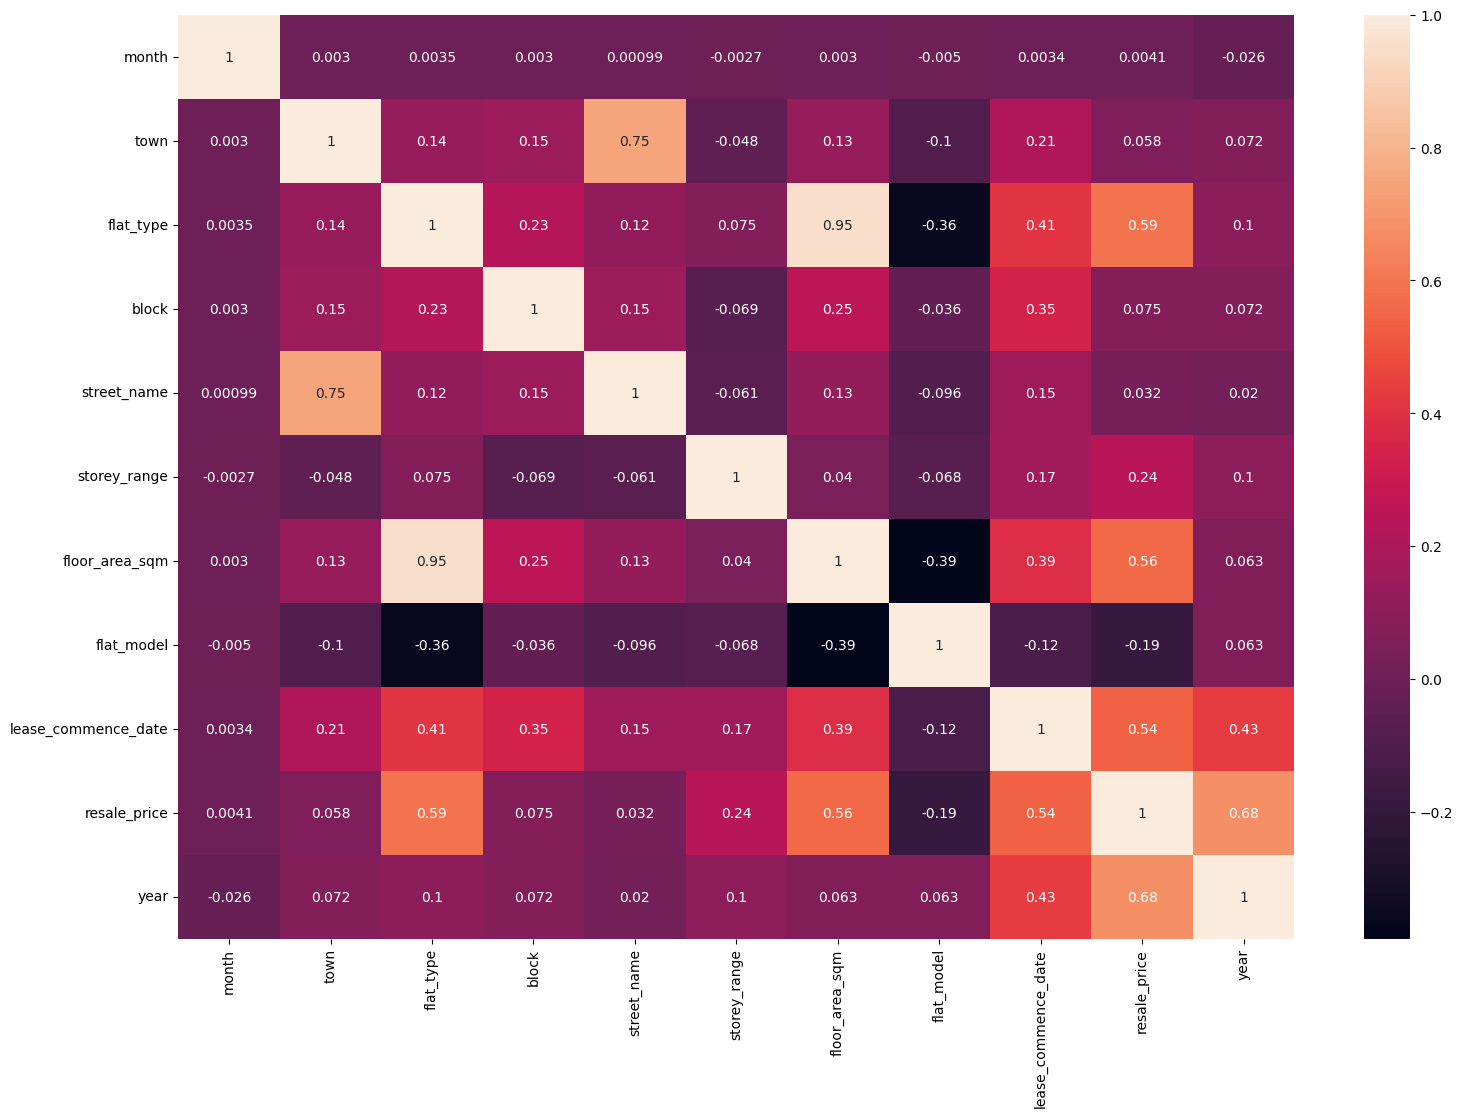

In [29]:
#Correlation
feature_cols = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price', 'year']
plt.figure(figsize = (18,12))
sns.heatmap(df[feature_cols].corr(), annot = True)

##Informations Obtained From Correlation

Flat type and flat area are highly correlated
Town and Street name are highly correlated
Resale price and year are highly correlated
Flat type and resale price are highly correlated
Floor area and resale price are highly correlated
resale_price and flat_type are highly correlated
Town, month, street name and storey range are lessly correlated to resale price

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927769 entries, 0 to 181565
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927769 non-null  int64  
 1   town                 927769 non-null  int32  
 2   flat_type            927769 non-null  int32  
 3   block                927769 non-null  int32  
 4   street_name          927769 non-null  int32  
 5   storey_range         927769 non-null  int32  
 6   floor_area_sqm       927769 non-null  float64
 7   flat_model           927769 non-null  int32  
 8   lease_commence_date  927769 non-null  int64  
 9   resale_price         927769 non-null  float64
 10  remaining_lease      218719 non-null  object 
 11  year                 927769 non-null  int64  
dtypes: float64(2), int32(6), int64(3), object(1)
memory usage: 70.8+ MB


In [60]:
df.describe()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
count,927769.000000,927769.000000,927769.000000,927769.000000,927769.000000,927769.000000,927769.000000,927769.000000,927769.000000,9.277690e+05,927769.000000
mean,6.550306,13.653670,3.013895,348.763297,285.969889,3.410194,95.690326,15.714735,1988.281130,3.209383e+05,2006.180235
std,3.412481,8.795451,0.948373,255.138443,181.601262,2.664494,25.824063,6.667263,10.668351,1.705994e+05,9.328823
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,28.000000,0.000000,1966.000000,5.000000e+03,1990.000000
25%,4.000000,5.000000,2.000000,127.000000,122.000000,2.000000,73.000000,9.000000,1981.000000,1.930000e+05,1999.000000
50%,7.000000,13.000000,3.000000,302.000000,278.000000,4.000000,93.000000,16.000000,1986.000000,2.980000e+05,2005.000000
75%,10.000000,23.000000,4.000000,534.000000,460.000000,5.000000,113.000000,21.000000,1996.000000,4.180000e+05,2014.000000
max,12.000000,26.000000,6.000000,999.000000,583.000000,24.000000,307.000000,33.000000,2020.000000,1.588000e+06,2024.000000


In [61]:
columns_to_drop = ['resale_price', 'remaining_lease']
# Separate features (X) and target variable (y)
X = df.drop(columns=columns_to_drop)
y = df['resale_price']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
x_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year
35670,11,25,5,361,521,4,144.0,15,1996,2016
147256,4,12,5,288,257,5,142.0,15,2000,2004
173237,10,26,3,279,567,2,104.0,12,1985,1997
214530,10,1,4,147,45,4,122.0,7,1987,1998
128839,7,1,2,545,42,5,68.0,20,1980,1996
...,...,...,...,...,...,...,...,...,...,...
259178,6,11,2,328,210,5,67.0,20,1983,1999
78642,2,25,4,214,330,13,118.0,9,1981,2002
131932,8,1,2,537,42,2,83.0,20,1980,1996
14308,9,21,3,275,157,0,90.0,23,2009,2012


In [63]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742215 entries, 35670 to 121958
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                742215 non-null  int64  
 1   town                 742215 non-null  int32  
 2   flat_type            742215 non-null  int32  
 3   block                742215 non-null  int32  
 4   street_name          742215 non-null  int32  
 5   storey_range         742215 non-null  int32  
 6   floor_area_sqm       742215 non-null  float64
 7   flat_model           742215 non-null  int32  
 8   lease_commence_date  742215 non-null  int64  
 9   year                 742215 non-null  int64  
dtypes: float64(1), int32(6), int64(3)
memory usage: 45.3 MB


In [64]:
#Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [65]:
#Predicting the model
y_pred = dt.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')


Mean Absolute Error: 19456.298532877358
Mean Squared Error: 876614982.9403561
R2 Score: 0.9700232076913131


In [66]:

pickle.dump(dt, open('data.pkl', 'wb'))


<Axes: xlabel='resale_price'>

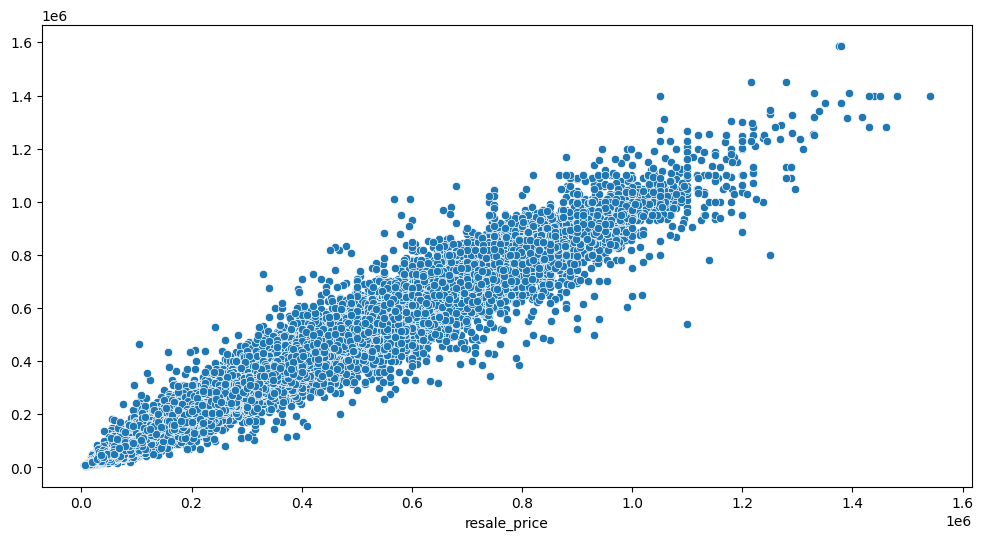

In [67]:
#Scatter plot of predicted vs actual
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [70]:
#Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10, max_depth=5)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 5287634156.080946
R2 Score: 0.81918366217117
Mean Absolute Error: 49895.905841824126


<Axes: xlabel='resale_price'>

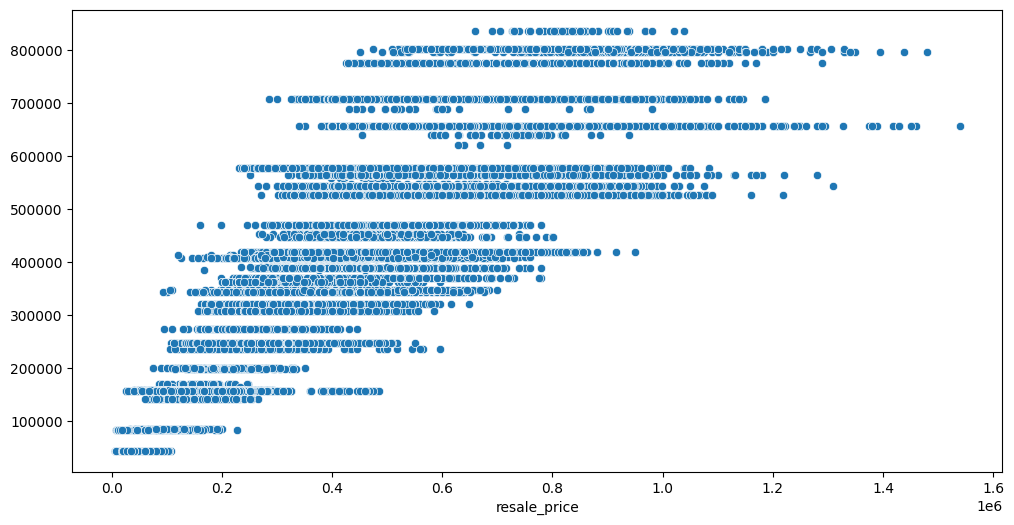

In [71]:
#Scatter plot of predicted vs actual
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)


In [72]:

pickle.dump(rf, open('randomforest.pkl', 'wb'))

In [73]:

# Create an instance of the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Predict the target variable using the test data
y_pred = lr.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")


Mean Squared Error: 6640023481.237848
Mean Absolute Error: 60629.79803343662
R2 Score: 0.7729372544441051


<Axes: xlabel='resale_price'>

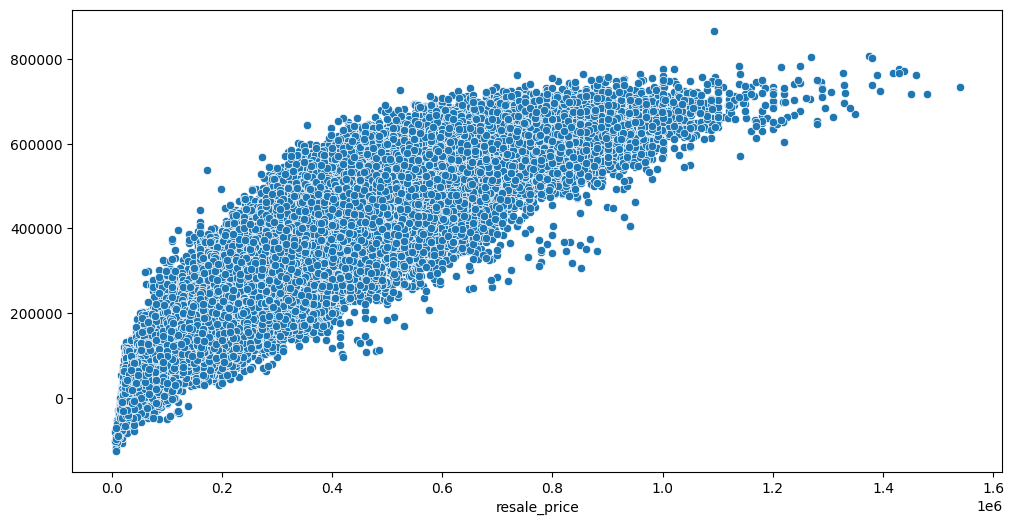

In [74]:
#Scatter plot of predicted vs actual
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [76]:
pickle.dump(lr, open('linearregg.pkl', 'wb'))


In [77]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,0,309,13,5,31.0,7,1977,9000.0,NaN,1990
1,1,0,0,309,13,2,31.0,7,1977,6000.0,NaN,1990
2,1,0,0,309,13,5,31.0,7,1977,8000.0,NaN,1990
3,1,0,0,309,13,4,31.0,7,1977,6000.0,NaN,1990
4,1,0,2,216,13,2,73.0,20,1976,47200.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
181561,5,26,5,834,575,2,154.0,15,1988,948000.0,62 years 09 months,2024
181562,6,26,5,826,575,5,146.0,15,1988,1000000.0,62 years 08 months,2024
181563,6,26,5,826,575,2,146.0,15,1988,1000000.0,62 years 08 months,2024
181564,2,26,6,666,556,2,164.0,19,1987,998000.0,62 years 11 months,2024


In [78]:
#Testing the model
ns = np.array([[1, 'ANG MO KIO', '2 ROOM', 309, 'ANG MO KIO AVE 1', '10 TO 12', 44, 'Improved', 1977, 2017]])

#columns to encode
en1 = le1.transform(ns[:, [1]])
en2 = le2.transform(ns[:, [2]])
en3 = le3.transform(ns[:, [4]])
en4 = le4.transform(ns[:, [5]])
en5 = le5.transform(ns[:, [7]])

# Convert 1D arrays to 2D arrays
en1 = en1[:, np.newaxis]
en2 = en2[:, np.newaxis]
en3 = en3[:, np.newaxis]
en4 = en4[:, np.newaxis]
en5 = en5[:, np.newaxis]

ns = np.concatenate((ns[:, [0]], en1, en2, ns[:, [3]], en3, en4, ns[:, [6]], en5, ns[:, [8]], ns[:, [9]]), axis=1)

#predict the resale price with the model
resale = dt.predict(ns)
print(f'the resale price is :{resale}')


the resale price is :[245000.]


c:\Users\tpsna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\tpsna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\tpsna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\tpsna\AppData